In [1]:
from sklearn import tree
x = [[0, 0], [1, 1]]
y = [0, 1]

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y) #학습

In [6]:
clf.predict([[2., 2.]]) #정답데이터가 0, 1만 존재

array([1])

In [7]:
clf.predict_proba([[2., 2.]]) #비율로 출력

array([[0., 1.]])

In [10]:
from sklearn.datasets import load_iris
from sklearn import tree

X, y = load_iris(return_X_y = True)

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

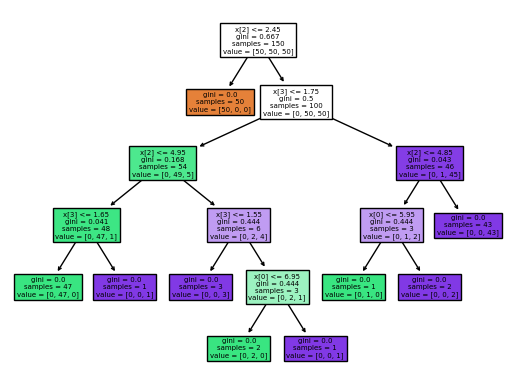

In [16]:
t = tree.plot_tree(clf.fit(X, y), filled=True)

##Pima Indians Diabetes Database
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [18]:
import pandas as pd #데이터분석
import numpy as np #수치계산
import seaborn as sns #시각화
import matplotlib.pyplot as plt #시각화

In [20]:
df = pd.read_csv("/content/sample_data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
split_count = int(df.shape[0] * 0.8) #인덱스값 설정
split_count

614

In [26]:
#데이터셋을 8:2 비율로 나누기
train = df[:split_count].copy() #0 ~ 613까지 자름
test = df[split_count:].copy() #614 ~ 767까지 자름

In [27]:
#학습, 예측에 사용할 컬럼
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [29]:
#정답이자 예측해야하는 값
label_name = train.columns[-1]
label_name

'Outcome'

In [30]:
#학습세트 만들기
X_train = train[feature_names]
y_train = train[label_name]

In [31]:
#예측세트 만들기
X_test = test[feature_names]
y_test = test[label_name]

In [32]:
from sklearn.tree import DecisionTreeClassifier #당뇨병인지 아닌지
model = DecisionTreeClassifier()

In [33]:
model.fit(X_train, y_train) #학습

DecisionTreeClassifier()

In [35]:
y_preds = model.predict(X_test) #예측
y_preds[:5]

array([1, 0, 1, 0, 1])

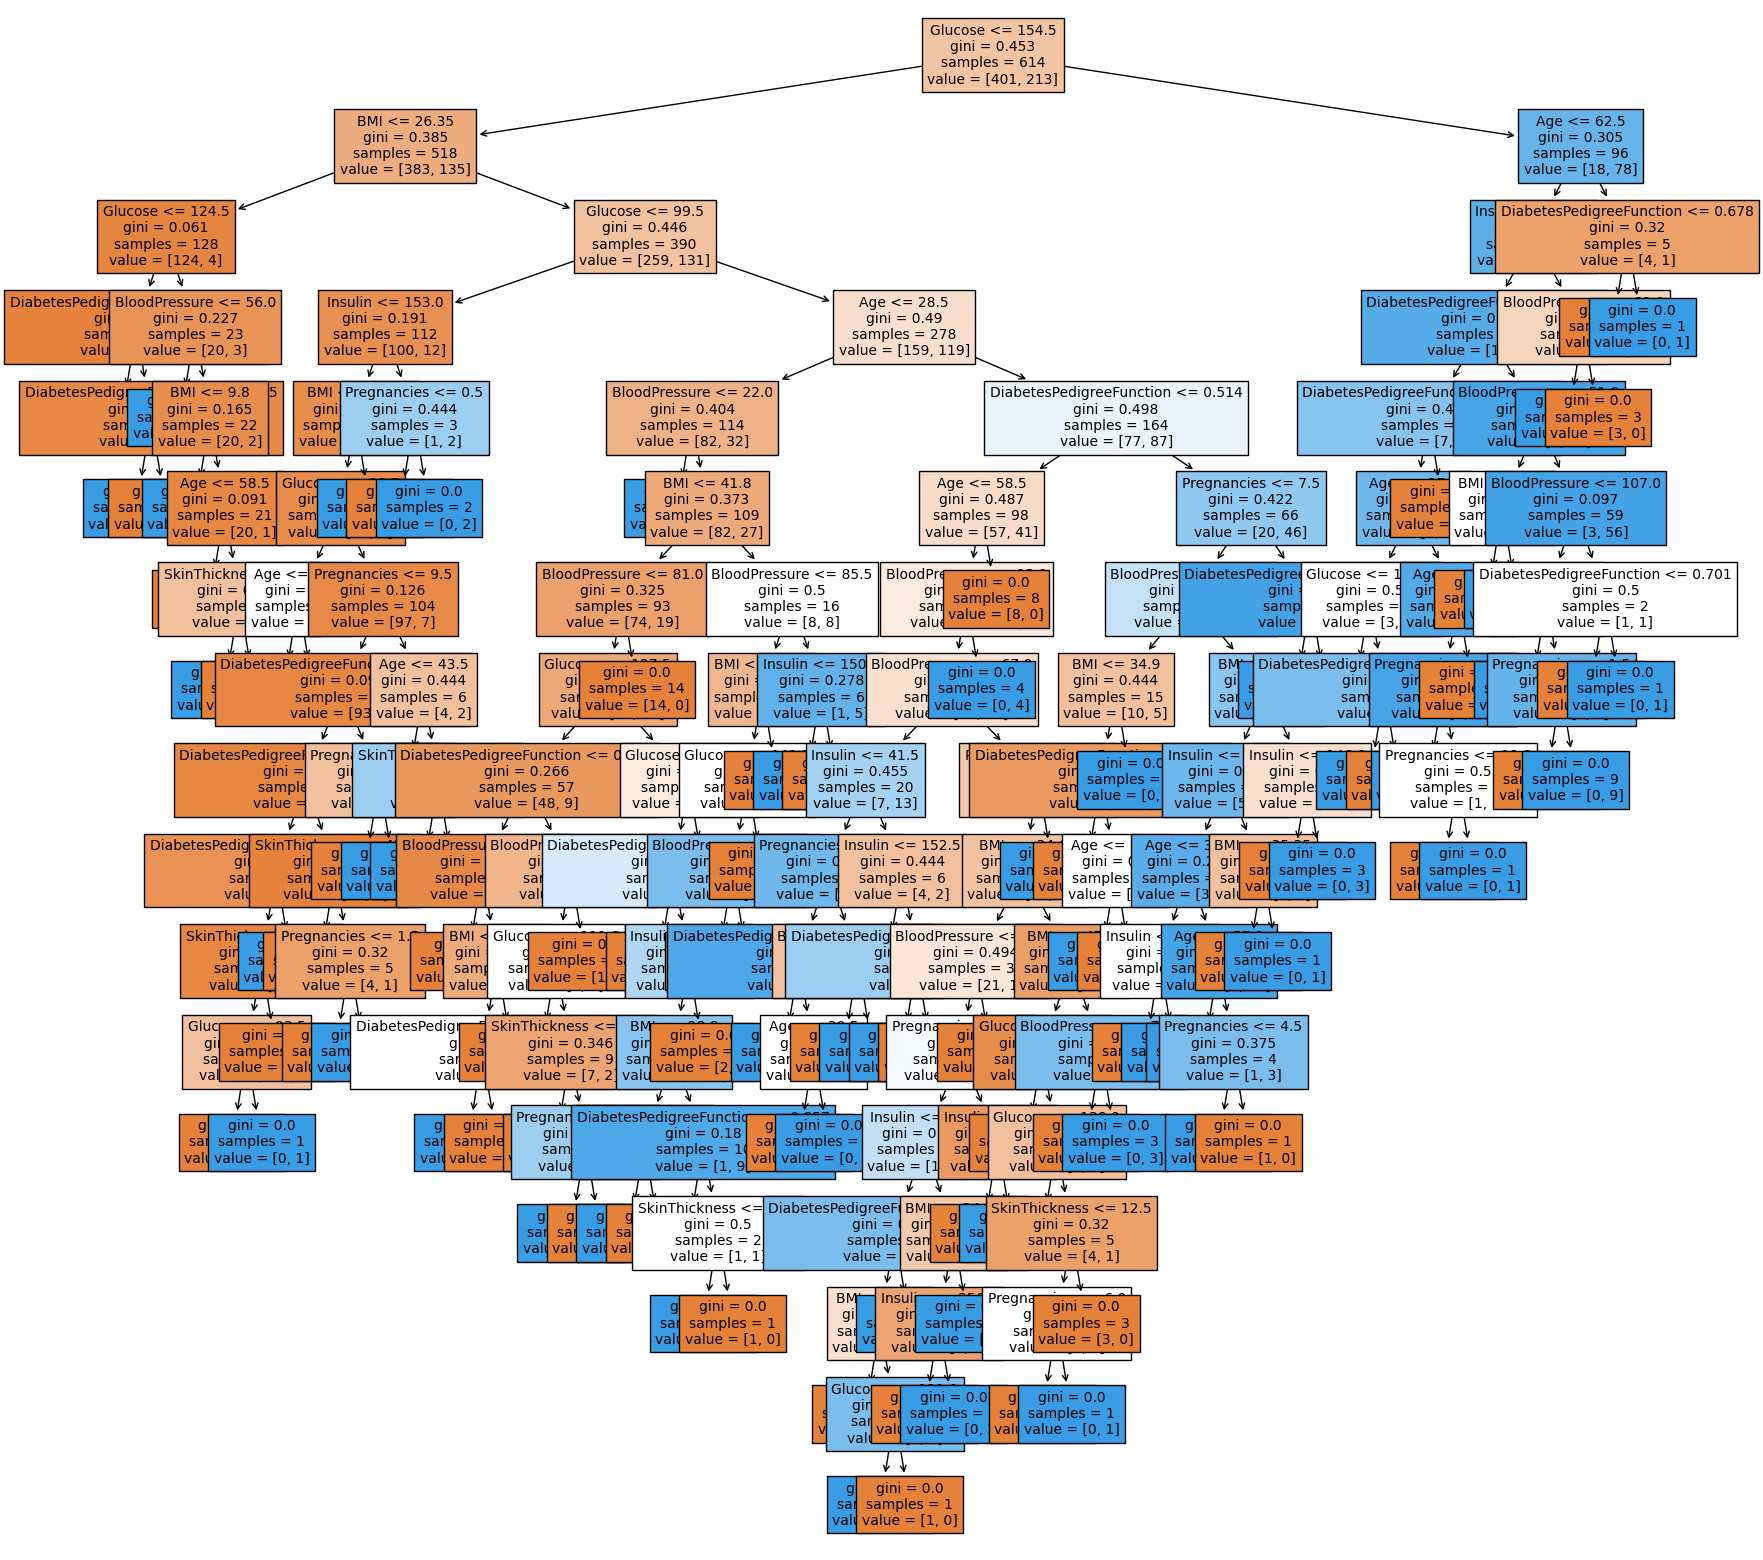

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20))
tree = plot_tree(model, feature_names = feature_names, filled = True, fontsize = 10)

<Axes: >

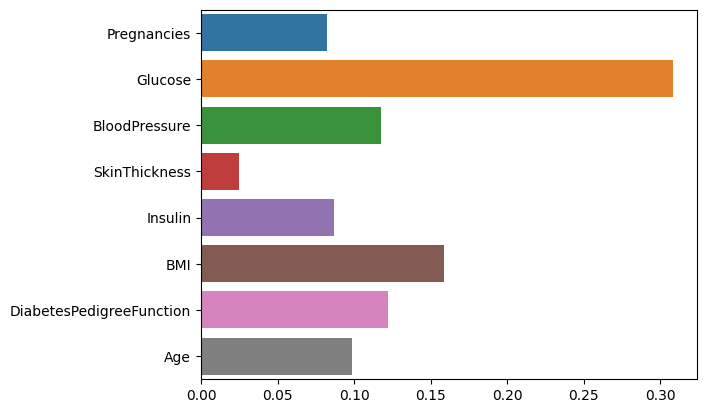

In [40]:
model.feature_importances_ #피처 중요도 추출
sns.barplot(x=model.feature_importances_, y = feature_names)

In [45]:
#같은 값은 0이 됨
diff_count = abs(y_test - y_preds).sum()
diff_count

44

In [46]:
#정확도 구하기 : 방법 1
(len(y_test) - diff_count) / len(y_test) * 100

71.42857142857143

In [47]:
#정확도 구하기 : 방법 2
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)
model.score(X_test, y_test) * 100

71.42857142857143

In [48]:
#정확도 구하기 : 방법 3
model.score(X_test, y_test) * 100

71.42857142857143